In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython import display as ICD
from nba_api.stats.endpoints import leaguegamefinder, boxscoreplayertrackv2, playercareerstats, teamplayerdashboard, leaguestandings
from nba_api.stats.static import players, teams

import numpy as np
import statsmodels.api as sm

import time

import warnings
warnings.filterwarnings("ignore")

# Team Standings

In [2]:
all_games = leaguegamefinder.LeagueGameFinder().get_data_frames()[0]

In [3]:
mapping = {'DEN':"1610612743", 
           'SAS':"1610612759", 
           'IND':"1610612754", 
           'MEM':"1610612763", 
           'NOP':"1610612740", 
           'CHI':"1610612741", 
           'MIN':"1610612750", 
           'MIA':"1610612748", 
           'ATL':"1610612737",
           'ORL':"1610612753", 
           'SAC':"1610612758", 
           'UTA':"1610612762", 
           'CHA':"1610612766", 
           'WAS':"1610612764", 
           'HOU':"1610612745", 
           'PHX':"1610612756", 
           'OKC':"1610612760", 
           'POR':"1610612757",
           'LAC':"1610612746", 
           'GSW':"1610612744", 
           'PHI':"1610612755", 
           'LAL':"1610612747", 
           'BKN':"1610612751", 
           'TOR':"1610612761", 
           'BOS':"1610612738", 
           'MIL':"1610612749", 
           'DET':"1610612765",
           'CLE':"1610612739", 
           'NYK':"1610612752"}

In [4]:
league_standings = leaguestandings.LeagueStandings().get_data_frames()[0]
league_standings[['TeamName','PointsPG','OppPointsPG']]

,TeamName,PointsPG,OppPointsPG
0,Lakers,113.8,106.8
1,Bucks,118.7,107.4
2,Raptors,112.9,106.3
3,Clippers,116.1,109.5
4,Celtics,113.0,107.0
5,Nuggets,110.3,107.7
6,Jazz,110.7,107.8
7,Heat,112.3,108.9
8,Pacers,109.6,107.6
9,Thunder,110.8,108.1


# Getting Team 2019 Game Data

In [5]:
nba_teams = teams.get_teams()
mavs_id = [team for team in nba_teams
         if team['full_name'] == 'Dallas Mavericks'][0]['id']
suns_id = [team for team in nba_teams
         if team['full_name'] == 'Phoenix Suns'][0]['id']

In [6]:
from nba_api.stats.endpoints import teamplayerdashboard
mavs_season_stats = teamplayerdashboard.TeamPlayerDashboard(mavs_id).get_data_frames()[1]
mavs_season_stats['PPG'] = mavs_season_stats['PTS']/mavs_season_stats['GP']
mavs_season_stats['MPG'] = mavs_season_stats['MIN']/mavs_season_stats['GP']
mavs_season_stats

,GROUP_SET,PLAYER_ID,PLAYER_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PPG,MPG
0,Players,1628499,Antonius Cleveland,7,4,3,0.571,22.370000,2,6,0.333,0,1,0.000,1,2,0.500,0,3,3,0,1,1,1,1,2,1,5,-11,13.6,0,0,17,17,3,14,18,17,18,17,16,17,16,17,16,17,17,17,17,18,17,17,17,4,2,16,17,18,18,10,2,0.714286,3.195714
1,Players,1626246,Boban Marjanovic,38,19,19,0.500,341.691667,99,176,0.563,4,15,0.267,36,48,0.750,56,102,158,13,26,7,7,12,48,44,238,68,463.1,5,0,11,11,10,16,13,11,12,4,15,14,14,10,10,12,7,11,8,12,11,12,10,10,9,10,11,9,11,3,2,6.263158,8.991886
2,Players,201584,Courtney Lee,24,15,9,0.625,345.488333,40,82,0.488,21,47,0.447,6,7,0.857,7,25,32,12,11,18,6,0,33,5,107,39,224.4,0,0,13,12,7,2,12,13,13,6,11,12,3,14,15,5,14,15,15,13,13,10,11,1,8,14,13,11,13,10,2,4.458333,14.395347
3,Players,1626153,Delon Wright,66,39,27,0.591,1427.133333,181,385,0.470,46,119,0.387,71,90,0.789,67,194,261,221,69,76,21,29,85,84,479,37,1345.7,1,0,2,1,17,9,7,7,8,7,7,9,6,6,7,10,6,5,5,2,3,1,5,15,12,6,7,12,6,7,2,7.257576,21.623232
4,Players,1627827,Dorian Finney-Smith,65,38,27,0.585,1925.733333,216,464,0.466,101,271,0.373,70,97,0.722,128,228,356,102,66,44,37,29,160,79,603,273,1360.2,3,0,3,3,17,11,1,5,6,9,6,6,9,8,5,14,1,4,4,6,4,3,3,15,18,8,6,3,5,4,2,9.276923,29.626667
5,Players,203939,Dwight Powell,40,25,15,0.625,1060.538333,146,229,0.638,10,39,0.256,74,111,0.667,75,152,227,59,36,34,22,13,102,116,376,195,868.9,1,0,10,10,9,2,8,9,10,3,13,13,15,5,4,15,4,7,6,10,9,7,4,12,13,5,9,5,9,7,2,9.400000,26.513458
6,Players,200826,J.J. Barea,26,13,13,0.500,390.498333,74,179,0.413,29,76,0.382,17,18,0.944,10,38,48,99,35,4,2,6,25,37,194,40,383.1,0,0,12,13,8,16,11,12,11,14,10,10,7,12,12,2,13,13,13,7,10,14,15,8,7,12,12,10,12,10,2,7.461538,15.019167
7,Players,1628973,Jalen Brunson,57,34,23,0.596,1022.073333,181,388,0.466,43,120,0.358,61,75,0.813,22,112,134,188,66,22,4,11,74,118,466,172,920.8,2,0,7,7,13,7,9,7,7,8,9,8,10,9,9,8,11,10,11,3,4,8,13,9,11,4,8,7,8,5,2,8.175439,17.931111
8,Players,1629729,Josh Reaves,2,1,1,0.500,1.485000,0,1,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,-5,0.0,0,0,18,18,1,16,19,19,19,19,16,19,16,19,19,19,17,19,19,18,18,19,18,1,1,19,19,17,19,10,2,0.000000,0.742500
9,Players,1628382,Justin Jackson,59,36,23,0.610,937.060000,124,312,0.397,45,151,0.298,36,44,0.818,27,116,143,49,12,12,10,14,58,41,329,16,628.1,0,0,6,5,13,5,10,10,9,15,8,7,13,10,11,7,8,8,9,11,12,11,8,13,10,11,10,13,10,10,2,5.576271,15.882373


In [7]:
suns_season_stats = teamplayerdashboard.TeamPlayerDashboard(suns_id).get_data_frames()[1]
suns_season_stats['PPG'] = suns_season_stats['PTS']/suns_season_stats['GP']
suns_season_stats['MPG'] = suns_season_stats['MIN']/suns_season_stats['GP']

suns_season_stats

,GROUP_SET,PLAYER_ID,PLAYER_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,PPG,MPG
0,Players,203382,Aron Baynes,42,19,23,0.452,934.436667,183,381,0.480,59,168,0.351,56,75,0.747,71,166,237,67,50,10,23,16,141,98,481,-46,914.9,3,0,10,9,10,4,8,7,7,6,6,6,8,8,8,15,3,7,7,8,7,13,4,12,15,6,7,12,7,6,2,11.452381,22.248492
1,Players,1629661,Cameron Johnson,50,21,29,0.420,1020.780000,141,333,0.423,92,232,0.397,36,47,0.766,40,103,143,54,30,31,16,14,77,44,410,-75,773.6,0,0,8,8,12,9,7,8,8,10,3,3,3,10,10,13,7,9,9,11,11,7,5,11,11,10,8,15,8,10,2,8.200000,20.415600
2,Players,1626166,Cameron Payne,1,1,0,1.000,18.953333,4,7,0.571,1,2,0.500,0,0,0.000,0,3,3,2,1,2,1,0,0,1,9,21,23.6,0,0,19,16,1,1,17,15,17,2,14,16,1,18,18,18,17,16,16,15,15,15,16,1,1,17,16,5,16,10,2,9.000000,18.953333
3,Players,1627767,Cheick Diallo,44,17,27,0.386,467.123333,89,137,0.650,1,2,0.500,32,37,0.865,28,99,127,22,30,10,12,11,54,35,211,-53,432.4,1,0,9,10,11,15,13,10,13,1,14,16,1,11,11,5,9,10,10,14,11,13,9,9,9,11,12,13,12,7,2,4.795455,10.616439
4,Players,203967,Dario Saric,59,25,34,0.424,1468.636667,221,476,0.464,75,217,0.346,85,101,0.842,89,262,351,112,76,35,15,38,136,118,602,-77,1265.2,9,0,3,3,16,8,5,5,5,7,4,4,11,5,5,8,2,2,3,5,4,6,7,16,14,5,4,16,6,4,2,10.203390,24.892147
5,Players,1629028,Deandre Ayton,31,13,18,0.419,1030.951667,266,479,0.555,2,6,0.333,60,78,0.769,126,246,372,60,72,22,53,30,99,81,594,49,1283.4,21,0,12,11,7,10,6,3,4,3,13,13,13,6,7,12,1,3,1,10,5,9,1,15,13,7,5,4,5,1,2,19.161290,33.256505
6,Players,1626164,Devin Booker,63,27,36,0.429,2276.968333,552,1139,0.485,128,357,0.359,414,451,0.918,27,236,263,412,249,46,16,63,192,394,1646,68,2516.6,10,0,2,1,18,7,1,1,1,5,1,1,5,1,1,4,10,4,5,2,1,4,5,18,18,1,1,2,1,3,2,26.126984,36.142354
7,Players,1629059,Elie Okobo,54,22,32,0.407,706.706667,72,181,0.398,25,71,0.352,46,67,0.687,16,72,88,113,38,24,4,6,53,58,215,-65,536.1,0,0,6,5,14,12,11,12,11,14,10,11,6,9,9,16,12,12,12,4,8,8,13,6,8,9,11,14,11,10,2,3.981481,13.087160
8,Players,1626163,Frank Kaminsky,33,13,20,0.394,728.440000,128,283,0.452,39,114,0.342,59,88,0.670,30,130,160,73,34,13,10,18,71,72,354,-26,690.5,1,0,11,11,8,13,10,9,9,8,9,9,12,7,6,17,8,8,8,7,9,11,10,13,10,8,9,10,9,7,2,10.727273,22.073939
9,Players,1629665,Jalen Lecque,4,1,3,0.250,26.336667,4,10,0.400,0,4,0.000,2,2,1.000,0,0,0,2,1,0,0,0,2,3,10,-22,12.0,0,0,15,16,4,18,16,15,15,12,16,14,16,15,15,1,17,18,18,15,15,18,17,1,4,15,15,9,17,10,2,2.500000,6.584167


In [8]:
# The first DataFrame of those returned is what we want.
curr_mavs_season = leaguegamefinder.LeagueGameFinder(team_id_nullable=mavs_id).get_data_frames()[0]
curr_suns_season = leaguegamefinder.LeagueGameFinder(team_id_nullable=suns_id).get_data_frames()[0]

curr_mavs_season = curr_mavs_season[curr_mavs_season['SEASON_ID'] == "22019"]
curr_suns_season = curr_suns_season[curr_suns_season['SEASON_ID'] == "22019"]

## Variance in Player Rotation
Preseason will have greater variance in player rotations. The goal is to use that to forecast PPG and OPPG

In [9]:
def missing_mins(curr_game_id, team_id, df):
    time.sleep(0.5)
    curr_game = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=curr_game_id).get_data_frames()[0]
    player_game_stats = curr_game[curr_game['TEAM_ID'] == int(team_id)]
    combined = pd.merge(df, player_game_stats, how='left', on='PLAYER_ID')
    missing_mins = combined[(combined['MIN_y'] == "0:00") | (combined['MIN_y'].isna())]['MPG'].sum()
    return missing_mins

In [10]:
def variance(curr_game_id, team_id):
    time.sleep(0.5)
    curr_game = boxscoreplayertrackv2.BoxScorePlayerTrackV2(game_id=curr_game_id).get_data_frames()[0]
    minutes = curr_game[curr_game['TEAM_ID'] == int(team_id)]['MIN']
    minutes = minutes.apply(lambda x: int(x[:-3])*60+int(x[-2:]))
    minutes = minutes[minutes != 0]
    return minutes.var()

In [11]:
def create_table(season_copy, season_stats):
    curr_copy = season_copy[:]
    
    curr_copy['datetime'] = curr_copy['GAME_DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    curr_copy['reg_season'] = curr_copy['GAME_DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d') >= datetime(2019, 10, 22))

    curr_copy['OPTS'] = curr_copy['PTS'] - curr_copy['PLUS_MINUS']
    
    #filtering for only NBA teams
    curr_copy = curr_copy[curr_copy['MATCHUP'].apply(lambda x: x[-3:] in mapping)]
    
    curr_copy['OPP_TEAM_ID'] = curr_copy['MATCHUP'].apply(lambda x: mapping[x[-3:]])
    
    curr_copy['PPG_a'] = curr_copy['TEAM_ID'].apply(lambda x: league_standings[league_standings['TeamID'] == int(x)]['PointsPG'].iloc[0])
    curr_copy['OPPG_a'] = curr_copy['TEAM_ID'].apply(lambda x:league_standings[league_standings['TeamID'] == int(x)]['OppPointsPG'].iloc[0])
    
    curr_copy['PPG_b'] = curr_copy['OPP_TEAM_ID'].apply(lambda x:league_standings[league_standings['TeamID'] == int(x)]['PointsPG'].iloc[0])
    curr_copy['OPPG_b'] = curr_copy['OPP_TEAM_ID'].apply(lambda x:league_standings[league_standings['TeamID'] == int(x)]['OppPointsPG'].iloc[0])

    curr_copy['O_COEF'] = curr_copy['PTS'] / (curr_copy['PPG_a'] + curr_copy['OPPG_b'])
    curr_copy['D_COEF'] = curr_copy['OPTS'] / (curr_copy['PPG_b'] + curr_copy['OPPG_a'])
    
    print('variance')
    curr_copy['VARIANCE'] = curr_copy.apply(lambda x: variance(x['GAME_ID'], x['TEAM_ID']), axis = 1)
    
    print('missing mins')
    curr_copy['MISSING_MINS'] = curr_copy.apply(lambda x: missing_mins(x['GAME_ID'], x['TEAM_ID'], season_stats), axis = 1)
    
    return curr_copy
    

In [12]:
curr_mavs_season_copy = create_table(curr_mavs_season, mavs_season_stats)
curr_mavs_season_copy

variance
missing mins


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,datetime,reg_season,OPTS,OPP_TEAM_ID,PPG_a,OPPG_a,PPG_b,OPPG_b,O_COEF,D_COEF,VARIANCE,MISSING_MINS
0,22019,1610612742,DAL,Dallas Mavericks,0021901238,2020-07-31,DAL vs. HOU,L,265,149,50,105,0.476,21,49,0.429,28,38,0.737,13,42,55,30,7,4,20,36,-4.0,2020-07-31,True,153.0,1610612745,116.8,110.9,118.7,114.9,0.643073,0.666376,821757.472727,105.182249
4,22019,1610612742,DAL,Dallas Mavericks,0021900973,2020-03-11,DAL vs. DEN,W,240,113,42,92,0.457,12,35,0.343,17,23,0.739,13,39,52,23,9,2,10,14,8.0,2020-03-11,True,105.0,1610612743,116.8,110.9,110.3,107.7,0.503341,0.474684,454069.500000,182.438219
5,22019,1610612742,DAL,Dallas Mavericks,0021900965,2020-03-10,DAL @ SAS,L,240,109,42,92,0.457,17,44,0.386,8,11,0.727,7,35,42,23,8,3,14,19,0.2,2020-03-10,True,108.8,1610612759,116.8,110.9,113.4,115.0,0.470233,0.485065,522427.750000,148.446200
6,22019,1610612742,DAL,Dallas Mavericks,0021900952,2020-03-08,DAL vs. IND,L,240,109,39,91,0.429,14,43,0.326,17,25,0.680,9,33,42,19,7,5,10,17,-3.0,2020-03-08,True,112.0,1610612754,116.8,110.9,109.6,107.6,0.485740,0.507937,683587.777778,150.979341
7,22019,1610612742,DAL,Dallas Mavericks,0021900937,2020-03-06,DAL vs. MEM,W,239,121,45,95,0.474,18,47,0.383,13,17,0.765,13,35,48,30,11,9,10,11,25.0,2020-03-06,True,96.0,1610612763,116.8,110.9,113.0,114.1,0.524036,0.428763,344142.290909,147.554412
8,22019,1610612742,DAL,Dallas Mavericks,0021900923,2020-03-04,DAL vs. NOP,W,264,127,44,95,0.463,22,50,0.440,17,24,0.708,6,43,49,30,6,13,16,17,4.0,2020-03-04,True,123.0,1610612740,116.8,110.9,115.8,117.0,0.543199,0.542567,911390.444444,128.821405
9,22019,1610612742,DAL,Dallas Mavericks,0021900907,2020-03-02,DAL @ CHI,L,241,107,40,84,0.476,12,42,0.286,15,20,0.750,9,35,44,26,9,5,16,20,-2.0,2020-03-02,True,109.0,1610612741,116.8,110.9,106.8,109.9,0.471989,0.500689,484079.777778,156.974800
10,22019,1610612742,DAL,Dallas Mavericks,0021900896,2020-03-01,DAL @ MIN,W,241,111,44,94,0.468,11,40,0.275,12,19,0.632,6,50,56,28,10,7,14,16,20.0,2020-03-01,True,91.0,1610612750,116.8,110.9,113.3,117.5,0.473752,0.405888,500938.290909,134.476187
11,22019,1610612742,DAL,Dallas Mavericks,0021900880,2020-02-28,DAL @ MIA,L,240,118,40,84,0.476,21,50,0.420,17,19,0.895,4,31,35,25,0,3,11,25,-8.0,2020-02-28,True,126.0,1610612748,116.8,110.9,112.3,108.9,0.522818,0.564516,765628.400000,131.280059
12,22019,1610612742,DAL,Dallas Mavericks,0021900869,2020-02-26,DAL @ SAS,W,241,109,36,86,0.419,17,45,0.378,20,30,0.667,5,38,43,25,11,9,15,20,6.0,2020-02-26,True,103.0,1610612759,116.8,110.9,113.4,115.0,0.470233,0.459206,538363.333333,125.876598


In [13]:
curr_suns_season_copy = create_table(curr_suns_season, suns_season_stats)
curr_suns_season_copy

variance
missing mins


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,datetime,reg_season,OPTS,OPP_TEAM_ID,PPG_a,OPPG_a,PPG_b,OPPG_b,O_COEF,D_COEF,VARIANCE,MISSING_MINS
0,22019,1610612756,PHX,Phoenix Suns,0021901235,2020-07-31,PHX @ WAS,W,241,125,42,80,0.525,11,32,0.344,30,32,0.938,4,33,37,29,10,3,17,24,13.0,2020-07-31,True,112.0,1610612764,112.7,113.9,115.6,119.7,0.537866,0.488017,239586.750000,133.609191
4,22019,1610612756,PHX,Phoenix Suns,0021900966,2020-03-10,PHX @ POR,L,242,105,35,87,0.402,11,32,0.344,24,25,0.960,9,34,43,26,3,5,14,16,-7.2,2020-03-10,True,112.2,1610612757,112.7,113.9,114.0,115.5,0.460123,0.492321,705963.000000,171.107429
5,22019,1610612756,PHX,Phoenix Suns,0021900950,2020-03-08,PHX vs. MIL,W,239,140,47,85,0.553,19,43,0.442,27,31,0.871,8,39,47,30,6,4,14,23,9.0,2020-03-08,True,131.0,1610612749,112.7,113.9,118.7,107.4,0.636075,0.563199,437196.571429,184.194590
6,22019,1610612756,PHX,Phoenix Suns,0021900938,2020-03-06,PHX vs. POR,W,240,127,45,91,0.495,19,42,0.452,18,19,0.947,15,32,47,29,9,4,12,22,10.0,2020-03-06,True,117.0,1610612757,112.7,113.9,114.0,115.5,0.556529,0.513383,573290.777778,171.107429
7,22019,1610612756,PHX,Phoenix Suns,0021900914,2020-03-03,PHX vs. TOR,L,239,114,39,85,0.459,15,39,0.385,21,25,0.840,6,29,35,30,6,6,18,22,-9.0,2020-03-03,True,123.0,1610612761,112.7,113.9,112.9,106.3,0.520548,0.542328,302720.857143,161.549303
8,22019,1610612756,PHX,Phoenix Suns,0021900894,2020-02-29,PHX vs. GSW,L,240,99,34,83,0.410,12,29,0.414,19,23,0.826,8,32,40,24,3,5,19,25,-16.0,2020-02-29,True,115.0,1610612744,112.7,113.9,106.3,115.0,0.434783,0.522252,655340.690909,117.435324
9,22019,1610612756,PHX,Phoenix Suns,0021900884,2020-02-28,PHX vs. DET,L,241,111,45,75,0.600,9,23,0.391,12,17,0.706,5,33,38,31,9,5,18,14,-2.0,2020-02-28,True,113.0,1610612765,112.7,113.9,107.2,110.8,0.496644,0.511081,370752.750000,139.300811
10,22019,1610612756,PHX,Phoenix Suns,0021900871,2020-02-26,PHX vs. LAC,L,240,92,34,87,0.391,9,34,0.265,15,18,0.833,14,34,48,29,8,3,16,17,-10.0,2020-02-26,True,102.0,1610612746,112.7,113.9,116.1,109.5,0.414041,0.443478,463864.361111,139.300811
11,22019,1610612756,PHX,Phoenix Suns,0021900855,2020-02-24,PHX @ UTA,W,238,131,49,87,0.563,12,20,0.600,21,24,0.875,11,27,38,33,10,1,13,31,20.0,2020-02-24,True,111.0,1610612762,112.7,113.9,110.7,107.8,0.594104,0.494212,511955.090909,82.910830
12,22019,1610612756,PHX,Phoenix Suns,0021900839,2020-02-22,PHX @ CHI,W,239,112,38,86,0.442,10,30,0.333,26,31,0.839,17,30,47,26,10,4,19,23,8.0,2020-02-22,True,104.0,1610612741,112.7,113.9,106.8,109.9,0.503145,0.471228,729221.454545,82.612269


# Additional Columns
 - Home or Away ( only Away games are relevant in the bubble)
 - days since last game
 - score from last game


In [14]:
curr_mavs_season_copy['HOME'] = curr_mavs_season_copy['MATCHUP'].apply(lambda x: 'vs' in x)
curr_suns_season_copy['HOME'] = curr_suns_season_copy['MATCHUP'].apply(lambda x: 'vs' in x)

#days since last game
dates = list(curr_mavs_season_copy['datetime'])
date_diffs = list(pd.Series(dates) - pd.Series(dates[1:] + [dates[len(dates) - 1]]))
for x in range(len(dates)):
    date_diffs[x] = date_diffs[x].days
curr_mavs_season_copy['days_since_game'] = date_diffs

dates = list(curr_suns_season_copy['datetime'])
date_diffs = list(pd.Series(dates) - pd.Series(dates[1:] + [dates[len(dates) - 1]]))
for x in range(len(dates)):
    date_diffs[x] = date_diffs[x].days
curr_suns_season_copy['days_since_game'] = date_diffs

# score from last game
score = list(curr_mavs_season_copy['PTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
curr_mavs_season_copy['prev_pts'] = prev_score

score = list(curr_mavs_season_copy['OPTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
curr_mavs_season_copy['prev_opts'] = prev_score

score = list(curr_suns_season_copy['PTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
curr_suns_season_copy['prev_pts'] = prev_score

score = list(curr_suns_season_copy['OPTS'])
prev_score = list(pd.Series(score[1:] + [score[len(score) - 1]]))
curr_suns_season_copy['prev_opts'] = prev_score

# Initial Exploration
Looked ar correlation between Variance, 

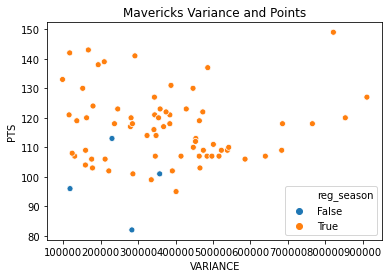

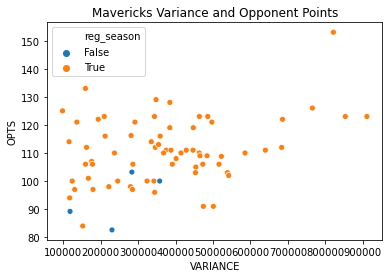

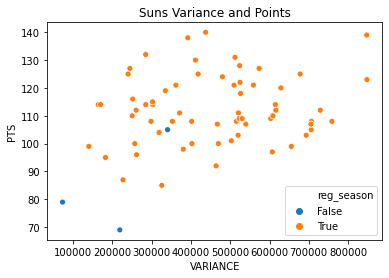

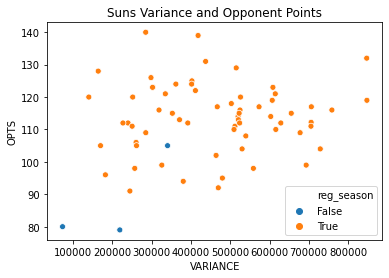

In [15]:
sns.scatterplot(x='VARIANCE', y='PTS', data=curr_mavs_season_copy, hue='reg_season')
plt.title("Mavericks Variance and Points")
plt.show()

sns.scatterplot(x='VARIANCE', y='OPTS', data=curr_mavs_season_copy, hue='reg_season')
plt.title("Mavericks Variance and Opponent Points")
plt.show()

sns.scatterplot(x='VARIANCE', y='PTS', data=curr_suns_season_copy, hue='reg_season')
plt.title("Suns Variance and Points")
plt.show()

sns.scatterplot(x='VARIANCE', y='OPTS', data=curr_suns_season_copy, hue='reg_season')
plt.title("Suns Variance and Opponent Points")
plt.show()

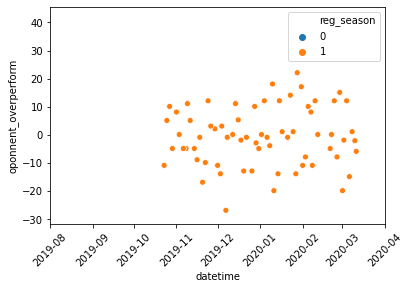

In [16]:
temp = pd.DataFrame()
temp['datetime'] = curr_mavs_season_copy['datetime']
temp['reg_season'] = curr_mavs_season_copy['reg_season'].astype(int)
temp['oponnent_overperform'] = curr_mavs_season_copy['OPTS'] - curr_mavs_season_copy['OPPG_a']
temp['game_id'] = curr_mavs_season_copy['GAME_ID']
sns.scatterplot(x='datetime', y='oponnent_overperform', hue='reg_season', data=temp)
plt.xticks(rotation=45)
plt.xlim(datetime(2019,8,1),datetime(2020,4,1))
plt.show()


In [17]:
temp = pd.DataFrame()
temp['VARIANCE'] = curr_mavs_season_copy['VARIANCE']
temp['reg_season'] = curr_mavs_season_copy['reg_season'].astype(int)
temp['oponnent_overperform'] = curr_mavs_season_copy['OPTS'] - curr_mavs_season_copy['OPPG_a']
temp['game_id'] = curr_mavs_season_copy['GAME_ID']
# temp.loc[len(temp)] = [81810.81061, 2, -10.3]
# temp.loc[len(temp)] = [94447.49091, 2, 8.7]
# temp.loc[len(temp)] = [163956.7436, 3, 5.4]
# sns.scatterplot(x='VARIANCE', y='oponnent_overperform', hue='reg_season', data=temp.iloc[0:-3])
# sns.scatterplot(x='VARIANCE', y='oponnent_overperform', c=['m'], data=temp.iloc[-3:])
# plt.xticks(rotation=45)
# plt.xlim(0,1000000)
# plt.show()
temp.sort_values('oponnent_overperform', ascending=False)

,VARIANCE,reg_season,oponnent_overperform,game_id
0,821757.472727,1,42.1,0021901238
24,158989.730769,1,22.1,0021900706
33,347764.090909,1,18.1,0021900572
23,384680.490909,1,17.1,0021900722
11,765628.400000,1,15.1,0021900880
27,97827.000000,1,14.1,0021900668
55,485994.444444,1,12.1,0021900235
8,911390.444444,1,12.1,0021900923
13,209327.818182,1,12.1,0021900854
36,853646.072727,1,12.1,0021900530


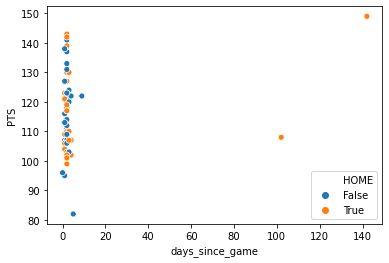

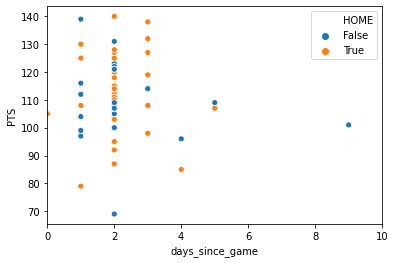

In [18]:
sns.scatterplot(x='days_since_game', y='PTS', hue='HOME', data=curr_mavs_season_copy)
plt.show()

sns.scatterplot(x='days_since_game', y='PTS', hue='HOME', data=curr_suns_season_copy)
plt.xlim(0,10)
plt.show()

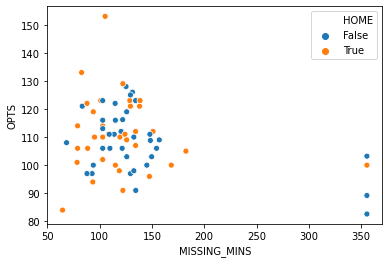

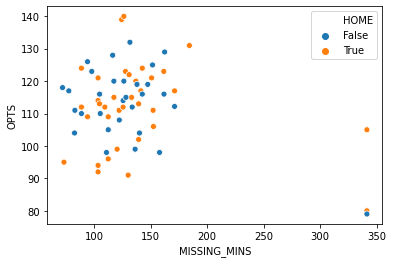

In [19]:
sns.scatterplot(x='MISSING_MINS', y='OPTS', hue='HOME', data=curr_mavs_season_copy)
plt.show()

sns.scatterplot(x='MISSING_MINS', y='OPTS', hue='HOME', data=curr_suns_season_copy)
plt.show()

# Bias Boosted Monte Carlo Simulation

In [20]:
curr_suns_season_copy

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,datetime,reg_season,OPTS,OPP_TEAM_ID,PPG_a,OPPG_a,PPG_b,OPPG_b,O_COEF,D_COEF,VARIANCE,MISSING_MINS,HOME,days_since_game,prev_pts,prev_opts
0,22019,1610612756,PHX,Phoenix Suns,0021901235,2020-07-31,PHX @ WAS,W,241,125,42,80,0.525,11,32,0.344,30,32,0.938,4,33,37,29,10,3,17,24,13.0,2020-07-31,True,112.0,1610612764,112.7,113.9,115.6,119.7,0.537866,0.488017,239586.750000,133.609191,False,143,105,112.2
4,22019,1610612756,PHX,Phoenix Suns,0021900966,2020-03-10,PHX @ POR,L,242,105,35,87,0.402,11,32,0.344,24,25,0.960,9,34,43,26,3,5,14,16,-7.2,2020-03-10,True,112.2,1610612757,112.7,113.9,114.0,115.5,0.460123,0.492321,705963.000000,171.107429,False,2,140,131.0
5,22019,1610612756,PHX,Phoenix Suns,0021900950,2020-03-08,PHX vs. MIL,W,239,140,47,85,0.553,19,43,0.442,27,31,0.871,8,39,47,30,6,4,14,23,9.0,2020-03-08,True,131.0,1610612749,112.7,113.9,118.7,107.4,0.636075,0.563199,437196.571429,184.194590,True,2,127,117.0
6,22019,1610612756,PHX,Phoenix Suns,0021900938,2020-03-06,PHX vs. POR,W,240,127,45,91,0.495,19,42,0.452,18,19,0.947,15,32,47,29,9,4,12,22,10.0,2020-03-06,True,117.0,1610612757,112.7,113.9,114.0,115.5,0.556529,0.513383,573290.777778,171.107429,True,3,114,123.0
7,22019,1610612756,PHX,Phoenix Suns,0021900914,2020-03-03,PHX vs. TOR,L,239,114,39,85,0.459,15,39,0.385,21,25,0.840,6,29,35,30,6,6,18,22,-9.0,2020-03-03,True,123.0,1610612761,112.7,113.9,112.9,106.3,0.520548,0.542328,302720.857143,161.549303,True,3,99,115.0
8,22019,1610612756,PHX,Phoenix Suns,0021900894,2020-02-29,PHX vs. GSW,L,240,99,34,83,0.410,12,29,0.414,19,23,0.826,8,32,40,24,3,5,19,25,-16.0,2020-02-29,True,115.0,1610612744,112.7,113.9,106.3,115.0,0.434783,0.522252,655340.690909,117.435324,True,1,111,113.0
9,22019,1610612756,PHX,Phoenix Suns,0021900884,2020-02-28,PHX vs. DET,L,241,111,45,75,0.600,9,23,0.391,12,17,0.706,5,33,38,31,9,5,18,14,-2.0,2020-02-28,True,113.0,1610612765,112.7,113.9,107.2,110.8,0.496644,0.511081,370752.750000,139.300811,True,2,92,102.0
10,22019,1610612756,PHX,Phoenix Suns,0021900871,2020-02-26,PHX vs. LAC,L,240,92,34,87,0.391,9,34,0.265,15,18,0.833,14,34,48,29,8,3,16,17,-10.0,2020-02-26,True,102.0,1610612746,112.7,113.9,116.1,109.5,0.414041,0.443478,463864.361111,139.300811,True,2,131,111.0
11,22019,1610612756,PHX,Phoenix Suns,0021900855,2020-02-24,PHX @ UTA,W,238,131,49,87,0.563,12,20,0.600,21,24,0.875,11,27,38,33,10,1,13,31,20.0,2020-02-24,True,111.0,1610612762,112.7,113.9,110.7,107.8,0.594104,0.494212,511955.090909,82.910830,False,2,112,104.0
12,22019,1610612756,PHX,Phoenix Suns,0021900839,2020-02-22,PHX @ CHI,W,239,112,38,86,0.442,10,30,0.333,26,31,0.839,17,30,47,26,10,4,19,23,8.0,2020-02-22,True,104.0,1610612741,112.7,113.9,106.8,109.9,0.503145,0.471228,729221.454545,82.612269,False,1,101,118.0


In [21]:
import random
from sklearn.linear_model import LinearRegression
def get_rand_sample(df, col_name, col_value, sample_col_name, N):
    weights = df[col_name].apply(lambda x: 1/abs(x-col_value) if x != col_value else 1/abs(x-0.99*col_value))
    to_return = random.choices(population=list(df[sample_col_name]), 
                          weights=weights,
                          k=N)
#     plt.hist(to_return, bins = 30)
#     plt.title(col_name + " " + sample_col_name)
#     plt.show()
    return to_return

In [23]:
pts_cols = ['MISSING_MINS','prev_pts','OPPG_b']
opts_cols = ['MISSING_MINS','prev_opts','PPG_b']

pts_cols_rename = [x + '_PTS' for x in pts_cols]
opts_cols_rename = [x + '_OPTS' for x in opts_cols]

In [38]:
def get_coefs(df, col_names, col_renames, pred_metric):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    predicted_scores['PRED_SCORE'] = predicted_scores[col_renames].apply(lambda x: lrc.predict([x])[0], axis = 1)
    predicted_scores['DIFF_SCORE'] = predicted_scores[pred_metric] - predicted_scores['PRED_SCORE']
    ICD.display(predicted_scores)
    ICD.display(pd.DataFrame(lrc.coef_, index=pts_cols_rename,columns=[lrc.score(X,y)]))

In [39]:
print("Mavericks PTS")
get_coefs(curr_mavs_season_copy, pts_cols, pts_cols_rename, 'PTS')
get_coefs(curr_mavs_season_copy, opts_cols, opts_cols_rename, 'OPTS')

print("Suns PTS")
get_coefs(curr_suns_season_copy, pts_cols, pts_cols_rename, 'PTS')
get_coefs(curr_suns_season_copy, opts_cols, opts_cols_rename, 'OPTS')



Mavericks PTS


,PTS,MISSING_MINS_PTS,prev_pts_PTS,OPPG_b_PTS,PRED_SCORE,DIFF_SCORE
0,149,121.8623,116.5014,123.1238,127.956504,21.043496
4,113,114.9380,116.9391,112.0411,112.340731,0.659269
5,109,112.5459,116.7527,126.7013,123.066061,-14.066061
6,109,112.7701,115.6058,112.0323,107.760568,1.239432
7,121,112.2404,116.5938,119.0109,115.502152,5.497848
8,127,117.8460,115.9312,118.1921,118.670026,8.329974
9,107,112.2563,116.3814,113.7080,110.298128,-3.298128
10,111,117.2030,116.6259,119.8791,120.942577,-9.942577
11,118,116.7921,116.7911,112.5051,114.192019,3.807981
12,109,113.7619,112.4690,126.5863,115.840792,-6.840792


,0.383678
MISSING_MINS_PTS,0.925151
prev_pts_PTS,1.924958
OPPG_b_PTS,0.907027


,OPTS,MISSING_MINS_OPTS,prev_opts_OPTS,PPG_b_OPTS,PRED_SCORE,DIFF_SCORE
0,153.0,116.42174,113.92420,112.76612,124.554225,28.445775
4,105.0,108.38350,110.53438,107.90634,106.932160,-1.932160
5,108.8,107.82382,110.05830,110.39820,108.546394,0.253606
6,112.0,108.66766,113.29394,106.17844,109.069745,2.930255
7,96.0,108.68034,109.59944,109.73980,107.973503,-11.973503
8,123.0,113.70694,109.38834,110.55646,113.284279,9.715721
9,109.0,109.26148,105.94964,106.63792,99.999706,9.000294
10,91.0,113.06738,107.45122,109.29904,108.604245,-17.604245
11,126.0,112.44602,110.31152,110.93712,113.809765,12.190235
12,103.0,114.72298,109.41236,110.45156,114.147193,-11.147193


,0.374589
MISSING_MINS_PTS,0.932389
prev_pts_PTS,1.380496
OPPG_b_PTS,1.120969


Suns PTS


,PTS,MISSING_MINS_PTS,prev_pts_PTS,OPPG_b_PTS,PRED_SCORE,DIFF_SCORE
0,125,114.0960,111.7151,114.9544,117.611661,7.388339
4,105,113.1263,109.6782,110.4384,110.815716,-5.815716
5,140,119.8180,109.9188,106.7076,117.303019,22.696981
6,127,113.7537,114.9427,110.6539,118.464347,8.535653
7,114,109.0864,110.0443,108.7730,104.986821,9.013179
8,99,101.0914,112.5747,115.4727,102.288823,-3.288823
9,111,110.9108,111.4436,111.4695,110.882264,0.117736
10,92,110.8447,106.6561,107.9266,102.386957,-10.386957
11,131,115.6854,112.5744,108.0609,116.243082,14.756918
12,112,121.7465,110.4296,108.8323,121.827852,-9.827852


,0.467792
MISSING_MINS_PTS,1.288452
prev_pts_PTS,1.272537
OPPG_b_PTS,0.654230


,OPTS,MISSING_MINS_OPTS,prev_opts_OPTS,PPG_b_OPTS,PRED_SCORE,DIFF_SCORE
0,112.0,114.80466,111.75286,117.79068,117.416983,-5.416983
4,112.2,115.16012,114.67620,114.32322,118.281677,-6.081677
5,131.0,118.90656,114.89118,115.87912,123.893366,7.106634
6,117.0,115.10204,111.29952,114.17566,114.937454,2.062546
7,123.0,117.13696,113.46048,109.30926,116.117524,6.882476
8,115.0,118.71832,112.22654,109.52706,116.947867,-1.947867
9,113.0,112.49914,112.53806,110.35372,110.525198,2.474802
10,102.0,112.54718,113.07314,118.59562,116.557166,-14.557166
11,111.0,108.62532,110.81404,114.71428,107.272503,3.727497
12,104.0,110.64616,115.60192,110.77304,111.523054,-7.523054


,0.465095
MISSING_MINS_PTS,1.168121
prev_pts_PTS,0.941281
OPPG_b_PTS,0.663948


In [34]:
def get_predictions(df, col_names, col_renames, pred_metric, feature_vector):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    for x in range(len(feature_vector)):
        feature_vector[x] = sum(get_rand_sample(df, col_names[x], feature_vector[x], pred_metric, 10000))/10000
    print(feature_vector)
    return lrc.predict([feature_vector])[0]

In [35]:
print("Mavericks")
print('Mavericks PTS: \t' + str(get_predictions(curr_mavs_season_copy, pts_cols, pts_cols_rename, 'PTS',[102.99, 149, 113.9])))
print('Mavericks OPTS:\t' + str(get_predictions(curr_mavs_season_copy, opts_cols, opts_cols_rename, 'OPTS', [102.99, 153, 112.7])))

print("Suns")
print('Suns PTS:  \t' + str(get_predictions(curr_suns_season_copy, pts_cols, pts_cols_rename, 'PTS', [133.6, 125, 110.9])))
print('Suns OPTS: \t' + str(get_predictions(curr_suns_season_copy, opts_cols, opts_cols_rename, 'OPTS', [133.6, 112, 116.8])))




Mavericks
[117.4595, 116.5454, 120.3055]
Mavericks PTS: 	121.4604179942038
[112.20083999999999, 109.82131999999946, 110.75009999999965]
Mavericks OPTS:	112.67860571123305
Suns
[124.3034, 110.9585, 111.0285]
Suns PTS:  	127.15753300947154
[112.16973999999999, 112.66921999999997, 115.97509999999967]
Suns OPTS: 	114.16085838413159


In [24]:
def get_confidence(df, col_names, col_renames, pred_metric, feature_vector, score):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    for x in range(len(feature_vector)):
        vals = np.array(get_rand_sample(df, col_names[x], feature_vector[x], pred_metric, 10000))
        feature_vector[x] = len(vals[np.where(vals <= score)])/10000
    return feature_vector

print('Mavericks OPTS:\t' + str(get_confidence(curr_mavs_season_copy, opts_cols, opts_cols_rename, 'OPTS', [102.99, 153, 112.7], 116)))
print('Suns PTS:  \t' + str(get_confidence(curr_suns_season_copy, pts_cols, pts_cols_rename, 'PTS', [133.6, 125, 110.9], 116)))





Mavericks OPTS:	[0.8403, 0.7289, 0.6946]
Suns PTS:  	[0.0477, 0.746, 0.8212]


In [25]:
confidence = [0.8403, 0.7289, 0.6946, 0.0477, 0.746, 0.8212]
print(sum(confidence)/len(confidence))

0.64645


Mavericks OPTS:	None
Suns PTS:  	None


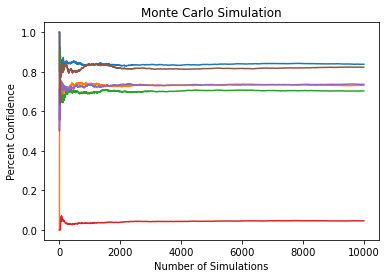

In [32]:
def get_graph(df, col_names, col_renames, pred_metric, feature_vector, score):
    predicted_scores = pd.DataFrame()
    predicted_scores[pred_metric] = df[pred_metric]
    for x in col_names:
        predicted_scores[x+'_'+pred_metric] = df[x].apply(lambda a: sum(get_rand_sample(df, x, a, pred_metric, 10000))/10000)

    X = predicted_scores[col_renames]
    y = predicted_scores[pred_metric]

    lrc = LinearRegression().fit(X,y)
    for x in range(len(feature_vector)):
        vals = pd.Series(get_rand_sample(df, col_names[x], feature_vector[x], pred_metric, 10000))
        vals = (vals <= score).astype(int).cumsum()
        for x in range(len(vals)):
            vals.iloc[x] = vals.iloc[x] / (x+1)
        vals.plot()
    return
print('Mavericks OPTS:\t' + str(get_graph(curr_mavs_season_copy, opts_cols, opts_cols_rename, 'OPTS', [102.99, 153, 112.7], 116)))
print('Suns PTS:  \t' + str(get_graph(curr_suns_season_copy, pts_cols, pts_cols_rename, 'PTS', [133.6, 125, 110.9], 116)))
plt.title('Monte Carlo Simulation')
plt.ylabel('Percent Confidence')
plt.xlabel('Number of Simulations')
plt.show()



